In [3]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

In [4]:
# Setup the figures
execfile('../code/figure-setup.py')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [18]:
# Upload the fitting results for each model
# Upload the fitting results for each model
bat_casey = pd.read_csv('../data/bat-agn-c12-params.csv', index_col=0)

bat_decompir = pd.read_csv('../data/bat-agn-decompir-params.csv', index_col=0)
bat_dale14 = pd.read_csv('../data/bat-agn-d14-params.csv', index_col=0)

# Remove 'bad' sources
bad_sources = np.array(['PICTORA', '3C111.0', '3C120',
                        '2MASXJ23272195+1524375', 'PKS2331-240',
                        'HB890241+622', 'Mrk3'])
bat_casey = bat_casey.drop(bad_sources)
bat_decompir = bat_decompir.drop(bad_sources)
bat_dale14 = bat_dale14.drop(bad_sources[:-1])

# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)

In [28]:
# Combine the total IR luminosities into one DataFrame
bat_lir = pd.DataFrame(index=bat_casey.index)
bat_lir['LIRC12'] = bat_casey['lir_total']
bat_lir['LIRC12_err_up'] = bat_casey['lir_total_err_high']
bat_lir['LIRC12_err_down'] = bat_casey['lir_total_err_low']
bat_lir['LIRC12_flag'] = bat_casey['lir_total_flag']
bat_lir['LIRDecompIR'] = bat_decompir['lir_total']
bat_lir['LIRDecompIR_err_up'] = bat_decompir['lir_total_err_high']
bat_lir['LIRDecompIR_err_down'] = bat_decompir['lir_total_err_low']
bat_lir['LIRDecompIR_flag'] = bat_decompir['lir_total_flag']
bat_lir['LIRD14'] = bat_dale14['lir_total']
bat_lir['LIRD14_err_up'] = bat_dale14['lir_total_err_high']
bat_lir['LIRD14_err_down'] = bat_dale14['lir_total_err_low']
bat_lir['LIRD14_flag'] = bat_dale14['lir_total_flag']

bat_lir.loc['2MASXiJ1802473-145454', 'LIRDecompIR'] = bat_lir.loc['2MASXiJ1802473-145454', 'LIRDecompIR'] + 2.046
bat_lir.loc['2MASXiJ1802473-145454', 'LIRD14'] = bat_lir.loc['2MASXiJ1802473-145454', 'LIRD14'] + 2.046

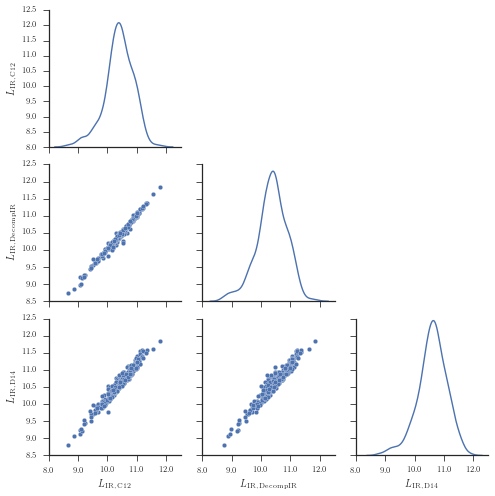

In [19]:
# Plot the correlation between each LIR using seaborn's pairplot method
g = sn.pairplot(bat_lir, diag_kind="kde", size=textwidth/3., aspect=1.)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

for i,ax in enumerate(g.axes[-1,:]):
    if i == 0:
        ax.xaxis.set_label_text(r'$L_{\rm IR,\,C12}$')
    elif i == 1:
        ax.xaxis.set_label_text(r'$L_{\rm IR,\,DecompIR}$')
    elif i == 2:
        ax.xaxis.set_label_text(r'$L_{\rm IR,\,D14}$')
    ax.xaxis.set_ticks([8.0, 9.0, 10.0, 11.0, 12.0])
    ax.xaxis.set_ticklabels(['8.0', '9.0', '10.0', '11.0', '12.0'])

for i,ax in enumerate(g.axes[:,0]):
    if i == 0:
        ax.yaxis.set_label_text(r'$L_{\rm IR,\,C12}$')
        #ax.yaxis.set_ticklabels([])
    elif i == 1:
        ax.yaxis.set_label_text(r'$L_{\rm IR,\,DecompIR}$')
    elif i == 2:
        ax.yaxis.set_label_text(r'$L_{\rm IR,\,D14}$')
#        if j == 0:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,C12}$')          
#        if j == 1:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,DecompIR}$')
#        if j == 2:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,D14}$')
g.fig.savefig(figsave_dir+'lir_total-comparison.pdf', bbox_inches='tight')

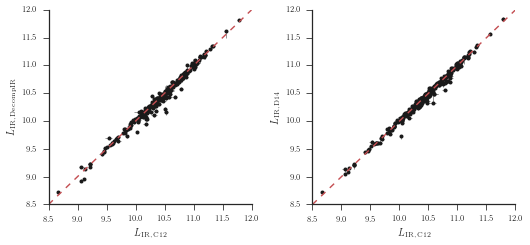

In [29]:
fig = plt.figure(figsize=(1.2*textwidth, 1/2.*textwidth))
ind = (bat_lir['LIRC12_flag'] == 0) & (bat_lir['LIRDecompIR_flag'] == 0)

ax1 = fig.add_subplot(121)
ax1.errorbar(bat_lir['LIRC12'][ind], bat_lir['LIRDecompIR'][ind],
             xerr=np.vstack([bat_lir['LIRC12_err_down'][ind], bat_lir['LIRC12_err_up'][ind]]),
             yerr=np.vstack([bat_lir['LIRDecompIR_err_down'][ind], bat_lir['LIRDecompIR_err_up'][ind]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax1.set_xlabel(r'$L_{\rm IR,\,C12}$')
ax1.set_ylabel(r'$L_{\rm IR,\,DecompIR}$')
ax1.plot(np.arange(8.5, 12.0, 0.001), np.arange(8.5, 12.0, 0.001), 'r--')
ax1.set_xlim(8.5, 12.0)
ax1.set_ylim(8.5, 12.0)

ax2 = fig.add_subplot(122)
ind = (bat_lir['LIRC12_flag'] == 0) & (bat_lir['LIRD14_flag'] == 0)
ax2.errorbar(bat_lir['LIRC12'][ind], bat_lir['LIRD14'][ind],
             xerr=np.vstack([bat_lir['LIRC12_err_down'][ind], bat_lir['LIRC12_err_up'][ind]]),
             yerr=np.vstack([bat_lir['LIRD14_err_down'][ind], bat_lir['LIRD14_err_up'][ind]]),
             fmt='o', color='k', ls='None', ecolor='grey', elinewidth=0.8, markersize=4)
ax2.set_xlabel(r'$L_{\rm IR,\,C12}$')
ax2.set_ylabel(r'$L_{\rm IR,\,D14}$')
ax2.plot(np.arange(8.5, 12.0, 0.001), np.arange(8.5, 12.0, 0.001), 'r--')
ax2.set_xlim(8.5, 12.0)
ax2.set_ylim(8.5, 12.0)
fig.subplots_adjust(wspace=0.3)
sn.despine()
fig.savefig(figsave_dir+'lir_total-comparison_nokde.pdf', bbox_inches='tight')

Notes:
Need to change the axis labels [DONE]
Need to adjust the line-width and marker sizes [no need to]
Need to adjust tick labels especially for x-axis [DONE]

In [24]:
bat_lir.loc['1RXSJ044154.5-082639']

LIRC12                  10.365657
LIRC12_err_up            0.033428
LIRC12_err_down          0.035342
LIRC12_flag              0.000000
LIRDecompIR             10.361519
LIRDecompIR_err_up       0.036676
LIRDecompIR_err_down     0.019767
LIRDecompIR_flag         0.000000
LIRD14                  10.377889
LIRD14_err_up            0.019945
LIRD14_err_down          0.033205
LIRD14_flag              0.000000
Name: 1RXSJ044154.5-082639, dtype: float64

In [30]:
# Analysis
bat_lir['LIRC12'].describe()

count    306.000000
mean      10.369783
std        0.493487
min        8.666124
25%       10.101804
50%       10.394668
75%       10.708909
max       11.777180
Name: LIRC12, dtype: float64

In [31]:
bat_lir['LIRDecompIR'].describe()

count    306.000000
mean      10.356036
std        0.496531
min        8.715264
25%       10.079212
50%       10.390267
75%       10.694457
max       11.818541
Name: LIRDecompIR, dtype: float64

In [33]:
bat_lir['LIRD14'].describe()

count    306.000000
mean      10.364450
std        0.490906
min        8.717121
25%       10.099412
50%       10.385074
75%       10.689746
max       11.835384
Name: LIRD14, dtype: float64

In [34]:
(bat_lir['LIRC12'] - bat_lir['LIRDecompIR']).describe()

count    306.000000
mean       0.013747
std        0.075279
min       -0.176733
25%       -0.020326
50%        0.000649
75%        0.029241
max        0.437260
dtype: float64

In [35]:
(bat_lir['LIRC12'] - bat_lir['LIRD14']).describe()

count    306.000000
mean       0.005333
std        0.051079
min       -0.096678
25%       -0.026029
50%       -0.004110
75%        0.022746
max        0.307151
dtype: float64

In [37]:
(bat_lir['LIRD14'] - bat_lir['LIRDecompIR']).describe()

count    306.000000
mean       0.008413
std        0.059993
min       -0.123932
25%       -0.022979
50%        0.000219
75%        0.023321
max        0.306502
dtype: float64

In [38]:
bat_lir['LIRC12_err_down'].median()

0.028849459999999993